# Bike rental behaviour of Ford GoBike/Bay Wheels subscribers and casual users in San Francisco bay area in July 2020
## by Julian J. Schnell

## Investigation Overview

> In this investigation, I want to look at the different rental behaviour of subscribers and casual users of Ford GoBike/Bay Wheels bikes in July 2020 in San Francisco Bay Area.

## Dataset Overview

> The dataset consisted of 154967 bike rides that were conducted in July 2020. For analysis purposes, I had to clean some erroneous data and separate some outliers. Furthermore, I added some new features (such as duration, distance, weekday and hour) based on the provided data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_clean.csv')
df.member_casual.replace(to_replace='member', value='Subscriber', inplace=True)
df.member_casual.replace(to_replace='casual', value='Casual user', inplace=True)

df.rideable_type.replace(to_replace='docked_bike', value='Docked Bike', inplace=True)
df.rideable_type.replace(to_replace='electric_bike', value='Electric Bike', inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## In July 2020, the majority of Ford GoBike/BayWheels users were casual users

> Casual users accounted for 60% of all rides in July 2020, while subscribers accounted for 40%.

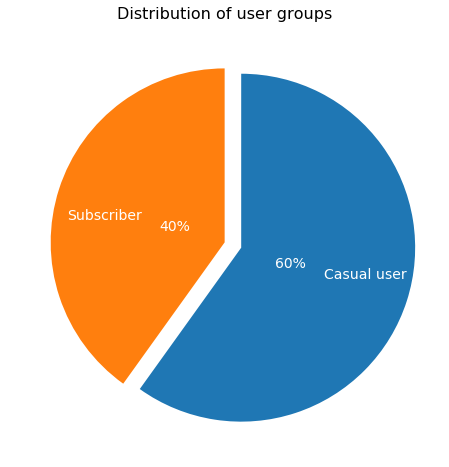

In [3]:
plt.figure(figsize=[8,8])
sorted_counts = df['member_casual'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, explode = (0.1, 0), startangle = 90, counterclock = False, autopct='%1.0f%%', pctdistance=0.3, labeldistance=0.5, textprops=dict(fontsize=14, color='w')); 
plt.title('Distribution of user groups', fontsize = 16);

## Casual users rented bikes on average around 5 minutes more

> While the average rental duration for subscribers was about 15 minutes, casual users rented bikes on average for around 20 minutes.

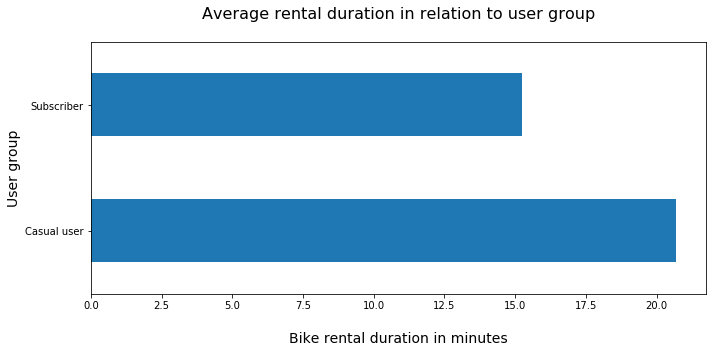

In [4]:
plt.figure(figsize=[10,5])
ax = df.groupby('member_casual')['duration'].mean().plot(kind='barh')
ax.set_title('Average rental duration in relation to user group\n', fontdict={'fontsize': 16, 'fontweight' : 'light', 'verticalalignment': 'baseline', 'horizontalalignment': 'center'})
ax.set_ylabel('User group', fontsize = 14)
ax.set_xlabel('\nBike rental duration in minutes', fontsize = 14)
plt.tight_layout()
plt.show()

## Both user groups rented electric bikes more often compared to docked bikes

>  While the number of docked bike rentals is almost equally distributed between casual users and subscribers, the number of  electric bike rentals is bigger for casual users.

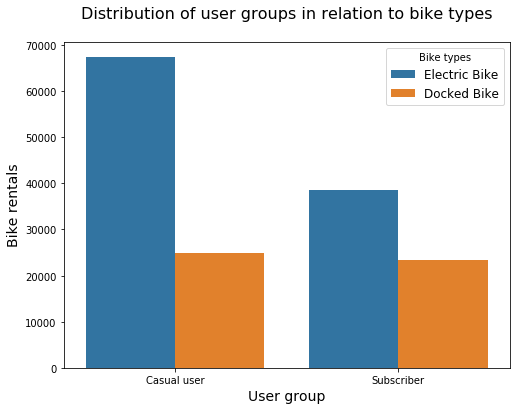

In [5]:
plt.figure(figsize=[8,6])
plt.title('Distribution of user groups in relation to bike types\n', fontsize = 16)
sb.countplot(data = df, x = 'member_casual', hue = 'rideable_type');
plt.legend(title="Bike types", loc=1, fontsize='large', fancybox=True);
plt.ylabel('Bike rentals', fontsize = 14);
plt.xlabel('User group', fontsize = 14);

## Peak rental days and times vary for casual users and subscribers

>  While subscribers most often started bike rentals on workdays after 4pm and before 8pm, casual users most often rented bikes in the afternoon on the weekend.


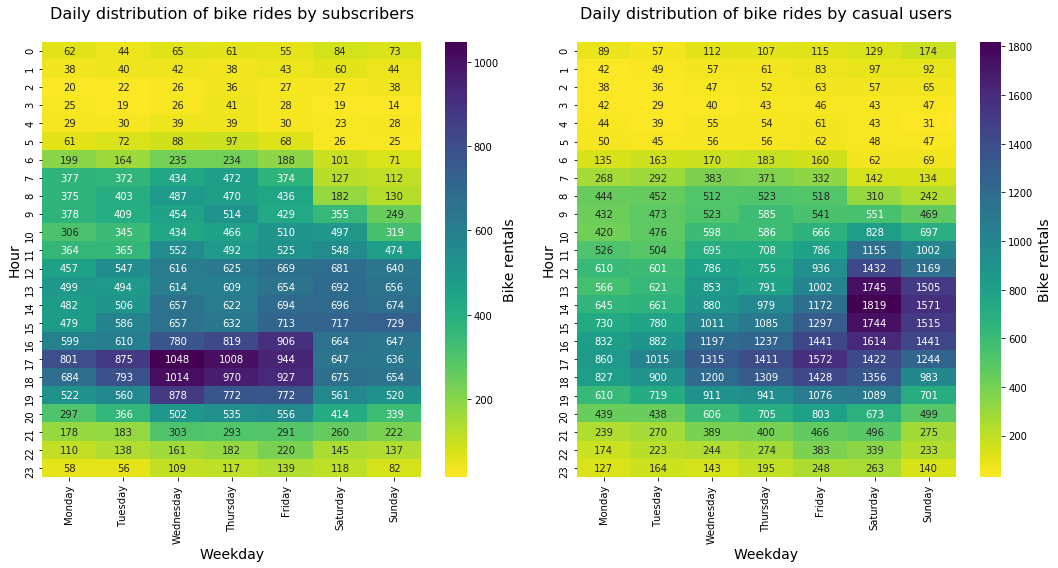

In [6]:
subscribers = df[df.member_casual == 'Subscriber']
casual_users = df[df.member_casual == 'Casual user']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.title('Daily distribution of bike rides by subscribers\n', fontsize = 16)
bike_ride_dist_subscribers = subscribers.groupby(['weekday', 'hour']).count()['distance_km'] 
bike_ride_dist_subscribers = bike_ride_dist_subscribers.reset_index(name = 'count') 
bike_ride_dist_subscribers = bike_ride_dist_subscribers.pivot(index = 'hour', columns = 'weekday', values = 'count') 
bike_ride_dist_subscribers = bike_ride_dist_subscribers.reindex(columns=weekday_order)
ax = sb.heatmap(bike_ride_dist_subscribers, cmap='viridis_r', annot = True, fmt = 'd', cbar_kws = {'label' : 'Bike rentals'});
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.ylabel('Hour', fontsize = 14);
plt.xlabel('Weekday', fontsize = 14);

plt.subplot(1,2,2)
plt.title('Daily distribution of bike rides by casual users\n', fontsize = 16)
bike_ride_dist_casual = casual_users.groupby(['weekday', 'hour']).count()['distance_km'] 
bike_ride_dist_casual = bike_ride_dist_casual.reset_index(name = 'count') 
bike_ride_dist_casual = bike_ride_dist_casual.pivot(index = 'hour', columns = 'weekday', values = 'count') 
bike_ride_dist_casual = bike_ride_dist_casual.reindex(columns=weekday_order)
ax = sb.heatmap(bike_ride_dist_casual, cmap='viridis_r', annot = True, fmt = 'd', cbar_kws = {'label' : 'Bike rentals'});
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.ylabel('Hour', fontsize = 14);
plt.xlabel('Weekday', fontsize = 14);

plt.tight_layout()

## Casual users also rented bikes for a longer duration on weekends

>  Not only the frequency of bike rentals by casual users is higher than bike rentals by subscribers, also bike rental duration is longer - especially on the weekend.

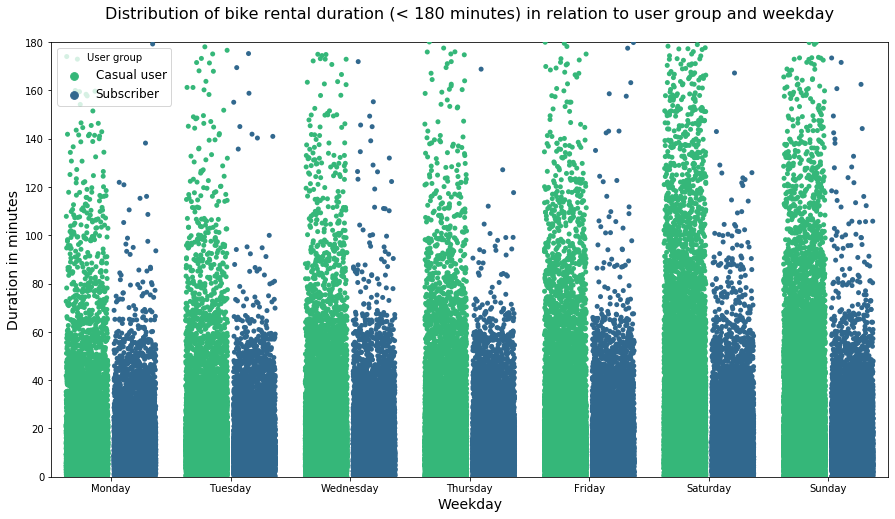

In [7]:
plt.figure(figsize=[15,8])
plt.title('Distribution of bike rental duration (< 180 minutes) in relation to user group and weekday\n', fontsize=16)
sb.stripplot(data = df, x = 'weekday', y = 'duration', hue='member_casual', jitter = 0.35, dodge=True, palette='viridis_r', order = weekday_order);
plt.legend(title="User group", loc=2, fontsize='large', fancybox=True);
plt.ylim(0,180);
plt.ylabel('Duration in minutes', fontsize=14);
plt.xlabel('Weekday', fontsize=14);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!